### mental and temp ETC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load datasets
mental_wellbeing_df = pd.read_csv("C:\dataset1\MentalWellbeingSurvey.csv", encoding='latin1')  # Update path if needed
temp_df = pd.read_csv("C:\\dataset1\\Temp_human_body.csv", encoding='latin1')  # Update path if needed


c:\Users\65811\jupyter\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
mental_wellbeing_df.head()

,year,gender,mean_score,social_intelligence,cognitive_efficacy,self_esteem,emotional_intelligence,resilience
0,2011,All,7.65,7.83,7.82,7.62,7.66,7.35
1,2011,Male,7.60,7.78,7.81,7.58,7.62,7.29
2,2011,Female,7.70,7.88,7.82,7.66,7.70,7.41


In [3]:
temp_df.head()

,Temp (°C),State,Well-being Score Range,Anger Reaction,Fear Reaction,Control Level,Physical Signs
0,37°C,Calm,8 to 10,Relaxed,No fear,Full control,Normal HR
1,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat
2,41°C,High Stress,4 to 5,Yelling,Sweating,Losing focus,Heart racing
3,43°C,Panic Mode,2 to 3,Shouting,Trembling,Erratic,High BP
4,45+°C,Total Breakdown,0 to 1,Rage,Frozen,Zero control,Hyperven


### data type

In [4]:
mental_wellbeing_df.info

<bound method DataFrame.info of    year  gender  mean_score  social_intelligence  cognitive_efficacy  \
0  2011     All        7.65                 7.83                7.82   
1  2011    Male        7.60                 7.78                7.81   
2  2011  Female        7.70                 7.88                7.82   

   self_esteem  emotional_intelligence  resilience  
0         7.62                    7.66        7.35  
1         7.58                    7.62        7.29  
2         7.66                    7.70        7.41  >

In [5]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Temp (°C)               5 non-null      object
 1   State                   5 non-null      object
 2   Well-being Score Range  5 non-null      object
 3   Anger Reaction          5 non-null      object
 4   Fear Reaction           5 non-null      object
 5   Control Level           5 non-null      object
 6   Physical Signs          5 non-null      object
dtypes: object(7)
memory usage: 408.0+ bytes


In [6]:
print(mental_wellbeing_df.dtypes)


year                        int64
gender                     object
mean_score                float64
social_intelligence       float64
cognitive_efficacy        float64
self_esteem               float64
emotional_intelligence    float64
resilience                float64
dtype: object


In [7]:
print(temp_df.dtypes)

Temp (°C)                 object
State                     object
Well-being Score Range    object
Anger Reaction            object
Fear Reaction             object
Control Level             object
Physical Signs            object
dtype: object


### merge dataset

In [8]:
# Load datasets
mental_wellbeing_df = pd.read_csv("C:\dataset1\MentalWellbeingSurvey.csv")
temp_df = pd.read_csv("C:\\dataset1\\Temp_human_body.csv", encoding='latin1')

# Map scores to mental temperature
def map_score_to_temp(score):
    if score >= 8:
        return "37°C"
    elif score >= 6:
        return "39°C"
    elif score >= 4:
        return "41°C"
    elif score >= 2:
        return "43°C"
    else:
        return "45+°C"

mental_wellbeing_df["Temp (°C)"] = mental_wellbeing_df["mean_score"].apply(map_score_to_temp)

# Merge both datasets
mental_temp_df = mental_wellbeing_df.merge(temp_df, on="Temp (°C)", how="left")
mental_temp_df.head(10)
mental_temp_df.tail(10)

,year,gender,mean_score,social_intelligence,cognitive_efficacy,self_esteem,emotional_intelligence,resilience,Temp (°C),State,Well-being Score Range,Anger Reaction,Fear Reaction,Control Level,Physical Signs
0,2011,All,7.65,7.83,7.82,7.62,7.66,7.35,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat
1,2011,Male,7.60,7.78,7.81,7.58,7.62,7.29,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat
2,2011,Female,7.70,7.88,7.82,7.66,7.70,7.41,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat


In [9]:
mental_temp_df.columns

Index(['year', 'gender', 'mean_score', 'social_intelligence',
       'cognitive_efficacy', 'self_esteem', 'emotional_intelligence',
       'resilience', 'Temp (°C)', 'State', 'Well-being Score Range',
       'Anger Reaction', 'Fear Reaction', 'Control Level', 'Physical Signs'],
      dtype='object')

In [10]:
mental_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    3 non-null      int64  
 1   gender                  3 non-null      object 
 2   mean_score              3 non-null      float64
 3   social_intelligence     3 non-null      float64
 4   cognitive_efficacy      3 non-null      float64
 5   self_esteem             3 non-null      float64
 6   emotional_intelligence  3 non-null      float64
 7   resilience              3 non-null      float64
 8   Temp (°C)               3 non-null      object 
 9   State                   3 non-null      object 
 10  Well-being Score Range  3 non-null      object 
 11  Anger Reaction          3 non-null      object 
 12  Fear Reaction           3 non-null      object 
 13  Control Level           3 non-null      object 
 14  Physical Signs          3 non-null      object

### Group data

# ✅ Risk Assessment Framework

## What You Can Do with This Data

### 1️⃣ Group People into Risk Categories Based On:

| Variable                  | Suggests Risk Of...                     |
|---------------------------|-----------------------------------------|
| Low resilience            | Overreaction, poor stress handling      |
| Low self_esteem           | Vulnerability to influence/acting out   |
| Low emotional_intelligence| Impulsive behavior                     |
| State = "High Stress" or "Panic Mode" | High agitation             |
| Anger Reaction = "Rage"   | Aggression potential                   |

### Risk Severity Levels:
- **Minor**: Irritation, verbal conflict
- **Severe**: Aggression, destruction
- **Major**: Physical violence or dangerous behavior

## 🛠 Implementation Steps

### Create a New Column: `crime_risk_level`
Possible values: `'Low'`, `'Medium'`, `'High'`




In [11]:
def assess_crime_risk(row):
    if row["State"] in ["Total Breakdown", "Panic Mode"]:
        if row["Anger Reaction"] in ["Rage", "Shouting"]:
            return "High"
        else:
            return "Medium"
    elif row["State"] == "High Stress":
        return "Medium"
    else:
        return "Low"

mental_temp_df["crime_risk_level"] = mental_temp_df.apply(assess_crime_risk, axis=1)


✅ 1. Build the crime_risk_level column

✅ 2. Design a scoring system based on the psychology + emotional state

🔁 Step 1: Create crime_risk_level from State + Reactions
Here’s a basic rule-based logic to assign 'Low', 'Medium', 'High':

In [12]:
def assess_crime_risk(row):
    state = row["State"]
    anger = row["Anger Reaction"]

    if state == "Total Breakdown":
        return "High"
    elif state == "Panic Mode" and anger in ["Shouting", "Rage"]:
        return "High"
    elif state == "High Stress" and anger in ["Yelling"]:
        return "Medium"
    elif state == "Mild Stress" and anger in ["Irritated"]:
        return "Low"
    else:
        return "Low"

mental_temp_df["crime_risk_level"] = mental_temp_df.apply(assess_crime_risk, axis=1)


🧮 Step 2: Add a Psychological Risk Score (0–10 scale)
We’ll base it on these traits:

Low resilience

Low emotional intelligence

Low self-esteem

In [13]:
def calculate_psych_score(row):
    # Higher score = higher crime risk
    base = 0
    if row["resilience"] < 6:
        base += 3
    elif row["resilience"] < 7:
        base += 2
    elif row["resilience"] < 8:
        base += 1

    if row["emotional_intelligence"] < 6:
        base += 2
    elif row["emotional_intelligence"] < 7:
        base += 1

    if row["self_esteem"] < 6:
        base += 2
    elif row["self_esteem"] < 7:
        base += 1

    return base

mental_temp_df["psych_risk_score"] = mental_temp_df.apply(calculate_psych_score, axis=1)


In [14]:
mental_temp_df.head(10)

,year,gender,mean_score,social_intelligence,cognitive_efficacy,self_esteem,emotional_intelligence,resilience,Temp (°C),State,Well-being Score Range,Anger Reaction,Fear Reaction,Control Level,Physical Signs,crime_risk_level,psych_risk_score
0,2011,All,7.65,7.83,7.82,7.62,7.66,7.35,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat,Low,1
1,2011,Male,7.60,7.78,7.81,7.58,7.62,7.29,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat,Low,1
2,2011,Female,7.70,7.88,7.82,7.66,7.70,7.41,39°C,Mild Stress,6 to 7,Irritated,Slight anxiety,Slightly shaky,Faster heartbeat,Low,1


C:\Users\65811\AppData\Local\Temp\ipykernel_20444\2595600289.py:7: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Verdana.
  plt.tight_layout()
c:\Users\65811\jupyter\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Verdana.
  fig.canvas.print_figure(bytes_io, **kw)


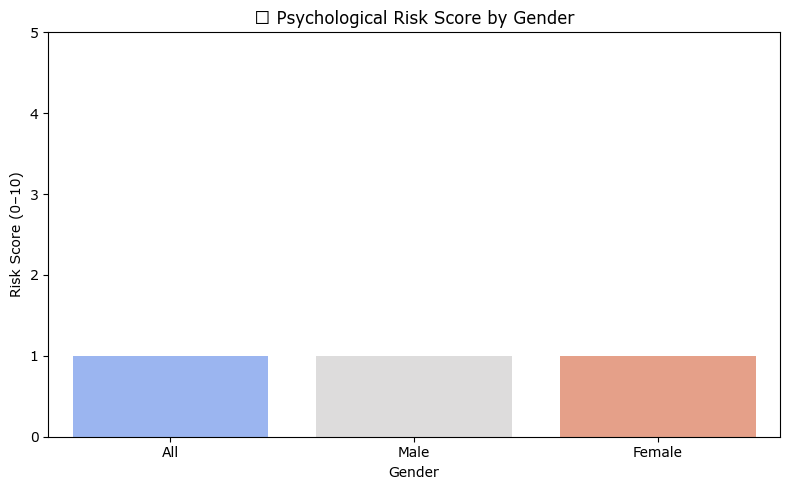

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=mental_temp_df, x="gender", y="psych_risk_score", palette="coolwarm")
plt.title("🧠 Psychological Risk Score by Gender")
plt.ylabel("Risk Score (0–10)")
plt.xlabel("Gender")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [21]:
mental_temp_df.describe()

,year,mean_score,social_intelligence,cognitive_efficacy,self_esteem,emotional_intelligence,resilience,psych_risk_score
count,3.0,3.000,3.000,3.000000,3.00,3.00,3.00,3.0
mean,2011.0,7.650,7.830,7.816667,7.62,7.66,7.35,1.0
std,0.0,0.050,0.050,0.005774,0.04,0.04,0.06,0.0
min,2011.0,7.600,7.780,7.810000,7.58,7.62,7.29,1.0
25%,2011.0,7.625,7.805,7.815000,7.60,7.64,7.32,1.0
50%,2011.0,7.650,7.830,7.820000,7.62,7.66,7.35,1.0
75%,2011.0,7.675,7.855,7.820000,7.64,7.68,7.38,1.0
max,2011.0,7.700,7.880,7.820000,7.66,7.70,7.41,1.0
